Answer-6.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge



In [42]:
np.random.seed(42)
m, c = 2.5, 1.0
x = np.linspace(0, 10, 100)
y_true = m * x + c

noise = np.random.normal(0, 1, 100)
y_noise = y_true + noise
split_idx = int(0.8 * len(x))

x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y_noise[:split_idx], y_noise[split_idx:]

In [43]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
m_hat, c_hat = model.coef_[0], model.intercept_
print(f"Mean Squared Error (MSE) on the testing set: {mse:.4f}")


Mean Squared Error (MSE) on the testing set: 0.4568


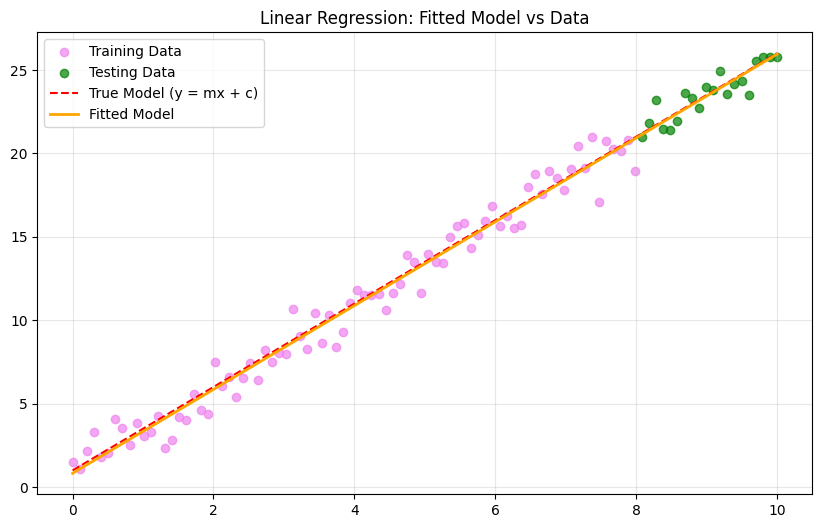

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color="violet", label="Training Data", alpha=0.7)
plt.scatter(x_test, y_test, color="green", label="Testing Data", alpha=0.7)
plt.plot(x, y_true, color="red", label="True Model (y = mx + c)", linestyle="--")

y_fitted = m_hat * x + c_hat
plt.plot(x, y_fitted, color="orange", label="Fitted Model", linewidth=2)

plt.title("Linear Regression: Fitted Model vs Data")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

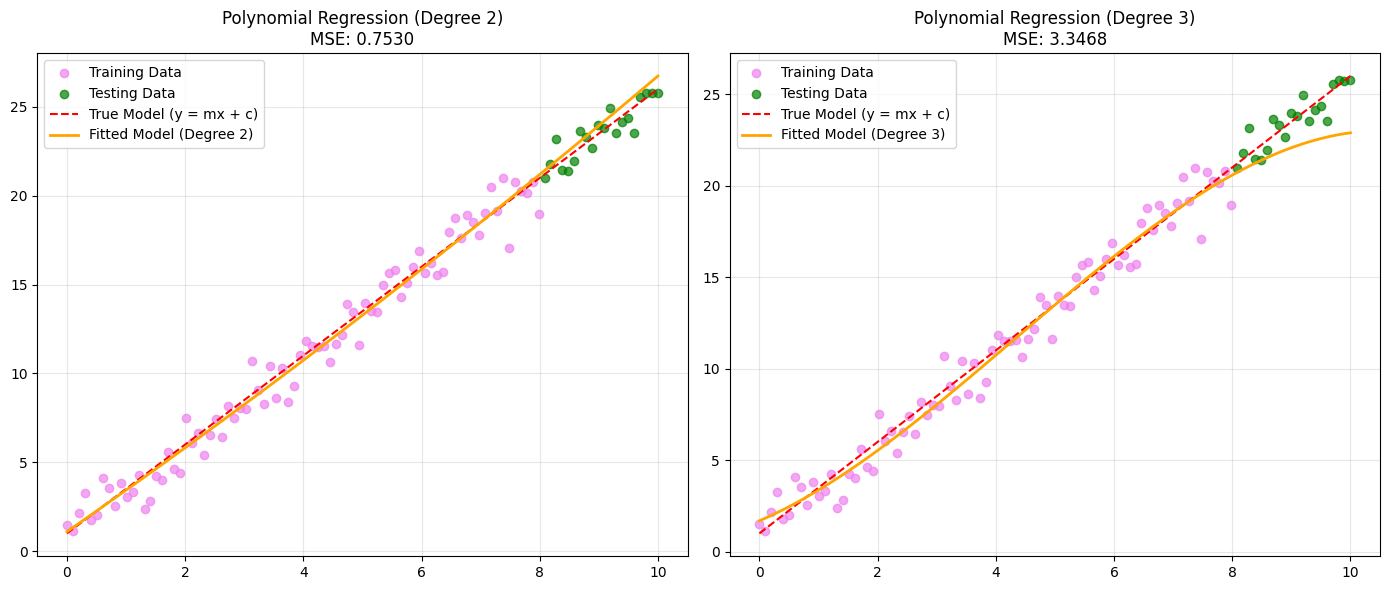

In [45]:
degrees = [2, 3]
plt.figure(figsize=(14, 6))

def polynomial_regression(x_train, y_train, x_test, y_test, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_train = poly.fit_transform(x_train.reshape(-1, 1))
    X_test = poly.transform(x_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    theta = np.append(model.intercept_, model.coef_[1:])
    return theta, y_pred, mse

for i, degree in enumerate(degrees):
    theta, y_pred, mse = polynomial_regression(x_train, y_train, x_test, y_test, degree)

    plt.subplot(1, 2, i + 1)
    plt.scatter(x_train, y_train, color="violet", label="Training Data", alpha=0.7)
    plt.scatter(x_test, y_test, color="green", label="Testing Data", alpha=0.7)
    plt.plot(x, y_true, color="red", label="True Model (y = mx + c)", linestyle="--")

    x_plot = np.linspace(0, 10, 100)
    X_plot = PolynomialFeatures(degree=degree).fit_transform(x_plot.reshape(-1, 1))
    y_plot = X_plot @ np.append(theta[0], theta[1:])
    plt.plot(x_plot, y_plot, color="orange", label=f"Fitted Model (Degree {degree})", linewidth=2)

    plt.title(f"Polynomial Regression (Degree {degree})\nMSE: {mse:.4f}")
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Answer-7.

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


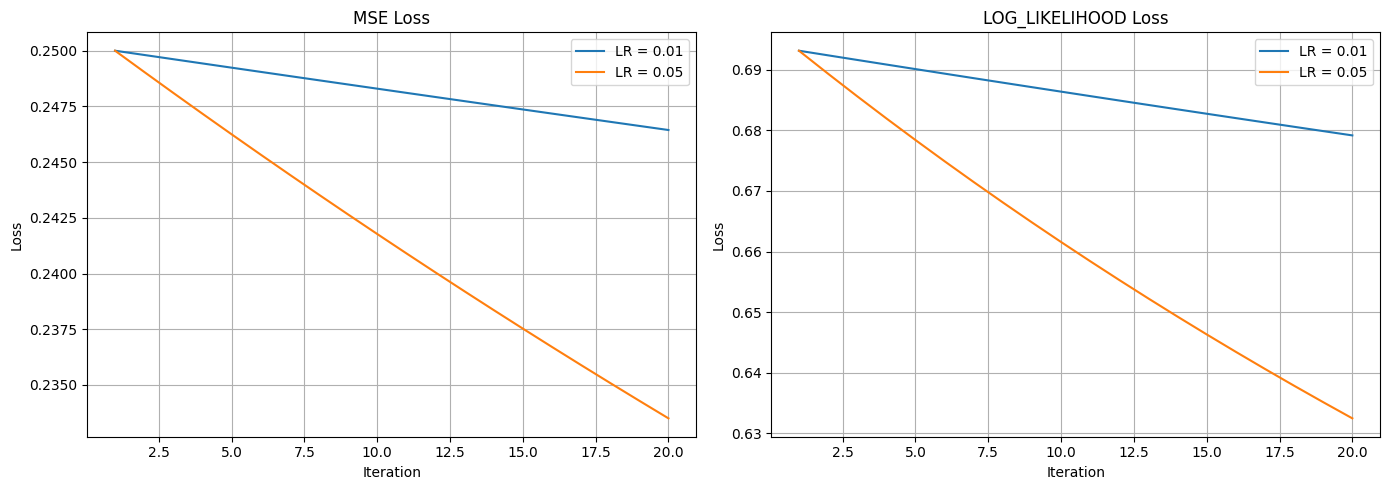

{'mse_lr_0.01': [-0.0237, 0.0106, -0.0086],
 'mse_lr_0.05': [-0.113, 0.052, -0.043],
 'log_likelihood_lr_0.01': [-0.0469, 0.0211, -0.0172],
 'log_likelihood_lr_0.05': [-0.2136, 0.102, -0.0856]}

In [47]:

path= '/content/drive/MyDrive/EE708/A2_P2.csv'
data = pd.read_csv(path)

X = data[['Feature 1', 'Feature 2']].values
y = data['Output'].values.reshape(-1, 1)

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def log_loss(y_true, y_pred):
    eps = 1e-15
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

def train(X, y, lr, steps, loss_type="mse"):
    n_samples, n_features = X.shape
    w = np.zeros((n_features, 1))
    all_losses = []

    for _ in range(steps):
        z = X @ w
        pred = sigmoid(z)

        if loss_type == "mse":
            loss = mse(y, pred)
            grad = (2 / n_samples) * X.T @ ((pred - y) * pred * (1 - pred))
        elif loss_type == "log_likelihood":
            loss = log_loss(y, pred)
            grad = (1 / n_samples) * X.T @ (pred - y)
        else:
            raise ValueError("Unknown loss type.")

        w -= lr * grad
        all_losses.append(loss)

    return w, all_losses

results = {}
for loss_name in ["mse", "log_likelihood"]:
    for lr in [0.01, 0.05]:
        key = f"{loss_name}_lr_{lr}"
        weights, losses = train(X, y, lr=lr, steps=20, loss_type=loss_name)
        results[key] = {"weights": weights, "losses": losses}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for i, loss_name in enumerate(["mse", "log_likelihood"]):
    ax = axes[i]
    for lr in [0.01, 0.05]:
        key = f"{loss_name}_lr_{lr}"
        ax.plot(range(1, 21), results[key]["losses"], label=f"LR = {lr}")
    ax.set_title(f"{loss_name.upper()} Loss")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

final_weights = {
    name: result["weights"].round(4).flatten().tolist()
    for name, result in results.items()
}
final_weights


Answer-8.

In [48]:
path = "/content/drive/MyDrive/EE708/A2_P3.csv"
data = pd.read_csv(path)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse, model.coef_


linear_model = LinearRegression()
lasso_model = Lasso(alpha=2.0)
ridge_model = Ridge(alpha=0.2)

linear_mse, linear_coef = train_and_evaluate(linear_model, X_train, X_test, y_train, y_test)
lasso_mse, lasso_coef = train_and_evaluate(lasso_model, X_train, X_test, y_train, y_test)
ridge_mse, ridge_coef = train_and_evaluate(ridge_model, X_train, X_test, y_train, y_test)
print("Linear Regression MSE:", linear_mse)
print("LASSO Regression MSE:", lasso_mse)
print("Ridge Regression MSE:", ridge_mse)



Linear Regression MSE: 4.722051939842389
LASSO Regression MSE: 22.266743419842328
Ridge Regression MSE: 4.684190961433674


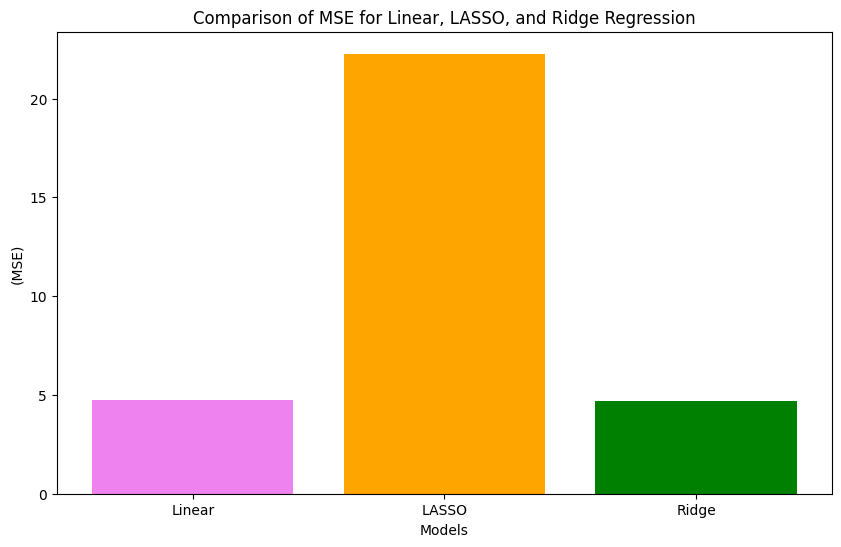

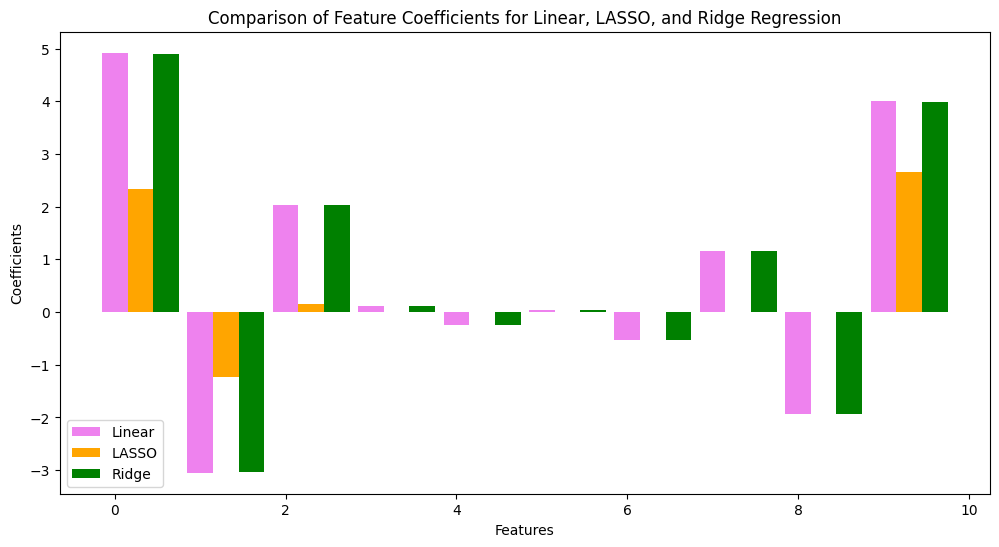

In [49]:
models = ['Linear', 'LASSO', 'Ridge']
mse_values = [linear_mse, lasso_mse, ridge_mse]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['violet', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('(MSE)')
plt.title('Comparison of MSE for Linear, LASSO, and Ridge Regression')
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(range(len(linear_coef)), linear_coef, width=0.3, label='Linear', color='violet')
plt.bar(np.arange(len(lasso_coef)) + 0.3, lasso_coef, width=0.3, label='LASSO', color='orange')
plt.bar(np.arange(len(ridge_coef)) + 0.6, ridge_coef, width=0.3, label='Ridge', color='green')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Comparison of Feature Coefficients for Linear, LASSO, and Ridge Regression')
plt.legend()
plt.show()